# Research Project: Power Outages

**Name(s)**: Matilda Gaddi

**Website Link**: https://matildagaddi.github.io/power-outage-attacks/

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import openpyxl

import plotly.express as px
pd.options.plotting.backend = 'plotly'
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from dsc80_utils import * # Feel free to uncomment and use this.

In [365]:
#!pip install openpyxl

## Step 1: Introduction

Power outages have the ability to impact the wellbeing of many people. Major power outages occur every year, so it is important to analyze and try to predict causes and characteristics of power outages. This project will use the dataset described below:

_The major outages witnessed by different states in the continental U.S. during January 2000–July 2016. As defined by the Department of Energy, the major outages refer to those that impacted atleast 50,000 customers or caused an unplanned firm load loss of atleast 300 MW. Besides major outage data, this article also presents data on geographical location of the outages, date and time of the outages, regional climatic information, land-use characteristics, electricity consumption patterns and economic characteristics of the states affected by the outages. This dataset can be used to identify and analyze the historical trends and patterns of the major outages and identify and assess the risk predictors associated with sustained power outages in the continental U.S._<br>(Mukherjee et al.)<br>

_This data contains information on geographical location of the outages, regional climatic information, land-use characteristics, electricity consumption patterns and economic characteristics of the states affected by the outages._<br>(Purdue University)<br>

This dataset is accessible at https://engineering.purdue.edu/LASCI/research-data/outages<br>
with detailed information at https://www.sciencedirect.com/science/article/pii/S2352340918307182

## Step 2: Data Cleaning and Exploratory Data Analysis

### Data Cleaning

In [366]:
#plotly go figure objects

In [4]:
#each observation is a major power outage
skip_cols = ['variables', 'OBS']
pwr = pd.read_excel('outage.xlsx', skiprows=[0, 1, 2, 3, 4, 6], usecols=lambda x: x not in skip_cols)
print(pwr.columns)
pwr #NaT = Not a Time

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT',
       'PCT

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011,7.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
1,2014,5.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
2,2010,10.0,Minnesota,MN,...,0.60,91.59,8.41,5.48
...,...,...,...,...,...,...,...,...,...
1531,2009,8.0,South Dakota,SD,...,0.15,98.31,1.69,1.69
1532,2009,8.0,South Dakota,SD,...,0.15,98.31,1.69,1.69
1533,2000,NaN,Alaska,AK,...,0.02,85.76,14.24,2.90


In [59]:
pwr['ANOMALY.LEVEL'].describe()

count   1525.000
mean      -0.097
std        0.740
min       -1.600
25%       -0.500
50%       -0.300
75%        0.300
max        2.300
Name: ANOMALY.LEVEL, dtype: float64

In [368]:
#px.scatter(pwr, x='OUTAGE.DURATION', y='CUSTOMERS.AFFECTED', trendline="ols", trendline_color_override="red")
# do a geographical plot

### Univariate Analysis

In [18]:
#1
to_plot = pwr.rename(columns= {'YEAR': '1'}).groupby('U.S._STATE')['1'].count()
display(to_plot)
fig_state_counts = px.bar(to_plot, labels = {'value': 'Count'}, title = 'Number of Power Outages by State')
#fig_state_counts.write_html('state_counts.html', include_plotlyjs='cdn')
fig_state_counts

U.S._STATE
Alabama           6
Alaska            1
Arizona          28
                 ..
West Virginia     4
Wisconsin        20
Wyoming           6
Name: 1, Length: 50, dtype: int64

In [19]:
px.bar(pwr.groupby('YEAR')['U.S._STATE'].count())

In [52]:
#2
grouped = pwr.rename(columns= {'YEAR': '1'}).groupby('CAUSE.CATEGORY').count()
fig_cause_counts = px.bar(grouped['1'], title = 'Number of Power Outages by Cause', labels = {'value':'Count'})#, x='YEAR')#, y='')#, trendline="ols", trendline_color_override="red")
fig_cause_counts.write_html('cause_counts.html', include_plotlyjs='cdn')
fig_cause_counts

In [162]:
#pwr[pwr['CAUSE.CATEGORY'] == 'intentional attack'].groupby('CAUSE.CATEGORY.DETAIL').count()

In [163]:
#2 univariate: Distribution of outage duration in minutes
# dur_sort = pwr.sort_values('OUTAGE.DURATION')['OUTAGE.DURATION'].reset_index().drop(columns = 'index')
# px.histogram(dur_sort)

In [164]:
# #
# pwr_attacks = pwr[pwr['CAUSE.CATEGORY']=='intentional attack']
# px.histogram(np.log(pwr_attacks['OUTAGE.DURATION']))

In [165]:
# px.histogram(pwr[pwr['OUTAGE.DURATION'].notna()].sort_values('OUTAGE.DURATION')['OUTAGE.DURATION'][-250:], nbins = 100)

### Bivariate Analysis

In [24]:
#1 count of outage duration by cause
# pwr_log = pwr.copy()
# pwr_log['OUTAGE.DURATION'] = np.log(pwr_log['OUTAGE.DURATION'])
# px.density_heatmap(pwr_log, x='CAUSE.CATEGORY', y='OUTAGE.DURATION')
pwr_cutoff = pwr[pwr['OUTAGE.DURATION'].notna()].sort_values('OUTAGE.DURATION')[:-250]
pwr_other_end = pwr[pwr['OUTAGE.DURATION'].notna()].sort_values('OUTAGE.DURATION')[-250:]
display(px.density_heatmap(pwr, x='CAUSE.CATEGORY', y='OUTAGE.DURATION', title='Number of Outages by Cause and Duration'))
display(pwr_other_end['CAUSE.CATEGORY'].value_counts(normalize=True))
display(px.density_heatmap(pwr_cutoff, x='CAUSE.CATEGORY', y='OUTAGE.DURATION', title=f'Number of Outages by Cause and Duration (Without Longest Outages)'))

severe weather                   8.72e-01
fuel supply emergency            7.60e-02
public appeal                    2.80e-02
intentional attack               1.20e-02
system operability disruption    8.00e-03
equipment failure                4.00e-03
Name: CAUSE.CATEGORY, dtype: float64

In [35]:
pwr_no_weather = pwr[pwr['CAUSE.CATEGORY'] != 'severe weather']
#pwr_cutoff = pwr[pwr['OUTAGE.DURATION'].notna()].sort_values('CUSTOMERS.AFFECTED')[1000:]
display(px.density_heatmap(pwr, x='CAUSE.CATEGORY', y='CUSTOMERS.AFFECTED'))

In [37]:
display(px.density_heatmap(pwr, x='CAUSE.CATEGORY', y='DEMAND.LOSS.MW'))

In [53]:
fig_dur_cause_bar = px.histogram(pwr['OUTAGE.DURATION'], color=pwr['CAUSE.CATEGORY'], title='Outage Duration by Cause', labels={'value': 'OUTAGE.DURATION'})
fig_dur_cause_bar.write_html('dur_cause_bar.html', include_plotlyjs='cdn')
fig_dur_cause_bar

In [31]:
fig_dl_vs_ca = px.scatter(pwr, x = 'DEMAND.LOSS.MW', y = 'CUSTOMERS.AFFECTED', trendline="ols", trendline_color_override="red", title='Customers Affected vs. Demand Loss')
fig_dl_vs_ca.write_html('customer_vs_demand.html', include_plotlyjs='cdn')
fig_dl_vs_ca

In [30]:
px.scatter(pwr, x = 'OUTAGE.DURATION', y = 'CUSTOMERS.AFFECTED', trendline="ols", trendline_color_override="red", title='Customers Affected vs. Outage Duration')

In [29]:
px.scatter(pwr, x = 'DEMAND.LOSS.MW', y = 'OUTAGE.DURATION', trendline="ols", trendline_color_override="red", title='Outage Duration vs. Demand Loss')

### Interesting Aggregates

In [55]:
!pip install tabulate

  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata


In [56]:
#pivot table
#proportion of outages in each cause category by region
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.0f}'.format
pwr_countable = pwr.copy()
pwr_countable['countable'] = [1]*pwr.shape[0]
display(pwr_countable.pivot_table(index = 'CLIMATE.REGION', columns = 'CAUSE.CATEGORY', values='countable', aggfunc='sum'))
pd.options.display.float_format = '{:.3f}'.format
#pd.reset_option('display.float_format')
cause_region_prop = pwr_countable.pivot_table(index = 'CLIMATE.REGION', columns = 'CAUSE.CATEGORY', values='countable', aggfunc='sum').apply(lambda x: x/x.sum(), axis=1)
cause_region_prop

CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
CLIMATE.REGION,,,,,,,
Central,7,4,38,3,2,135,11
East North Central,3,5,20,1,2,104,3
Northeast,5,14,135,1,4,176,15
Northwest,2,1,89,5,2,29,4
South,10,7,28,2,42,113,27
Southeast,5,NaN,9,NaN,5,118,16
Southwest,5,2,64,1,1,10,9
West,21,17,31,28,9,70,41
West North Central,1,1,4,5,2,4,NaN


CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
CLIMATE.REGION,,,,,,,
Central,0.035,0.020,0.190,0.015,0.010,0.675,0.055
East North Central,0.022,0.036,0.145,0.007,0.014,0.754,0.022
Northeast,0.014,0.040,0.386,0.003,0.011,0.503,0.043
Northwest,0.015,0.008,0.674,0.038,0.015,0.220,0.030
South,0.044,0.031,0.122,0.009,0.183,0.493,0.118
Southeast,0.033,NaN,0.059,NaN,0.033,0.771,0.105
Southwest,0.054,0.022,0.696,0.011,0.011,0.109,0.098
West,0.097,0.078,0.143,0.129,0.041,0.323,0.189
West North Central,0.059,0.059,0.235,0.294,0.118,0.235,NaN


In [57]:
cause_region_prop.to_markdown()

'| CLIMATE.REGION     |   equipment failure |   fuel supply emergency |   intentional attack |    islanding |   public appeal |   severe weather |   system operability disruption |\n|:-------------------|--------------------:|------------------------:|---------------------:|-------------:|----------------:|-----------------:|--------------------------------:|\n| Central            |           0.035     |              0.02       |            0.19      |   0.015      |       0.01      |         0.675    |                       0.055     |\n| East North Central |           0.0217391 |              0.0362319  |            0.144928  |   0.00724638 |       0.0144928 |         0.753623 |                       0.0217391 |\n| Northeast          |           0.0142857 |              0.04       |            0.385714  |   0.00285714 |       0.0114286 |         0.502857 |                       0.0428571 |\n| Northwest          |           0.0151515 |              0.00757576 |            0.674242  | 

In [170]:
pwr[pwr['CAUSE.CATEGORY'] == 'intentional attack'].groupby('CAUSE.CATEGORY.DETAIL').count()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
CAUSE.CATEGORY.DETAIL,,,,,,,,,,,,,,,,,,,,,
sabotage,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
suspicious activity,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
vandalism,335,335,335,335,335,335,335,335,335,335,...,335,335,335,335,335,335,335,335,335,335


In [171]:
state_dist = (pwr.groupby('U.S._STATE')['YEAR'].count().to_frame())
attack_state_dist = (pwr[pwr['CAUSE.CATEGORY'] == 'intentional attack']
                     .groupby('U.S._STATE')['YEAR'].count().to_frame())
state_dist.merge(attack_state_dist, left_index=True, right_index=True)

,YEAR_x,YEAR_y
U.S._STATE,,
Alabama,6,1
Arizona,28,18
Arkansas,25,6
California,210,24
Colorado,15,5
Connecticut,18,8
Delaware,41,37
Florida,45,2
Georgia,17,1


In [172]:
# def get_tvd(dist1, dist2):
#     return np.abs(dist1 - dist2).sum(axis=1) / 2
# get_tvd(state_dist, attack_state_dist)   

#look at hypotheses for heroes bhbe!!
def state_attack_perm():
    def get_tvd(dist1, dist2):
        return np.abs(dist1 - dist2).sum(axis=1) / 2
    def observed_tvd():
        state_dist = pwr.groupby('U.S._STATE')['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        attack_state_dist = pwr[pwr['CAUSE.CATEGORY'] == 'intentional attack'].groupby('U.S._STATE')['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        #print(get_tvd(state_dist, attack_state_dist))
        return get_tvd(state_dist, attack_state_dist).iloc[0]
    def sim_null_tvd(): #difference in color distribution
        shuffled = pwr.copy()
        shuffled['CAUSE.CATEGORY'] = np.random.permutation(shuffled['CAUSE.CATEGORY'])
        state_dist = shuffled.groupby('U.S._STATE')['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        attack_state_dist = shuffled[shuffled['CAUSE.CATEGORY'] == 'intentional attack'].groupby('U.S._STATE')['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        #print(get_tvd(state_dist, attack_state_dist))
        return get_tvd(state_dist, attack_state_dist).iloc[0]

    def trial():
        tvds = []
        for _ in range(1000):
            tvds.append(sim_null_tvd())
        observed_stat = observed_tvd()
        p_val = (np.array(tvds) >= observed_stat).mean()
        fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                       title='Empirical Distribution of the Test Stat') 
        fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
        fig.show()
        return p_val #tvds

    return trial()
state_attack_perm()

0.0

In [173]:
def feature_attack_perm(feature):
    def get_tvd(dist1, dist2):
        return np.abs(dist1 - dist2).sum(axis=1) / 2
    def observed_tvd():
        state_dist = pwr.groupby(feature)['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        attack_state_dist = pwr[pwr['CAUSE.CATEGORY'] == 'intentional attack'].groupby(feature)['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        #print(get_tvd(state_dist, attack_state_dist))
        return get_tvd(state_dist, attack_state_dist).iloc[0]
    def sim_null_tvd(): #difference in color distribution
        shuffled = pwr.copy()
        shuffled['CAUSE.CATEGORY'] = np.random.permutation(shuffled['CAUSE.CATEGORY'])
        state_dist = shuffled.groupby(feature)['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        attack_state_dist = shuffled[shuffled['CAUSE.CATEGORY'] == 'intentional attack'].groupby(feature)['YEAR'].count().to_frame().T.apply(lambda x: x/x.sum(), axis = 1)
        #print(get_tvd(state_dist, attack_state_dist))
        return get_tvd(state_dist, attack_state_dist).iloc[0]

    def trial():
        tvds = []
        for _ in range(1000):
            tvds.append(sim_null_tvd())
        observed_stat = observed_tvd()
        p_val = (np.array(tvds) >= observed_stat).mean()
        fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                       title='Empirical Distribution of the Test Stat') 
        fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
        fig.show()
        return p_val #tvds
    p_value = trial()
    print(f'{feature} related to intentional attack p-value: {p_value}')
    return p_value

# feat_p_dct = {}
# for feature in pwr.columns:
#     feat_p_dct[feature] = feature_attack_perm(feature)
feature_attack_perm('NERC.REGION')

NERC.REGION related to intentional attack p-value: 0.0


0.0

## Step 3: Assessment of Missingness

In [360]:
na_df = pd.DataFrame()
na_df['count'] = pwr.isna().sum()
na_df['prop of all rows'] = na_df['count'] / pwr.shape[0]
na_df#[na_df['count'] > 0]
#climate region : MAR depends on state name
#hurricane names : MBD, duration, small hurricane
#customers affected : might be NMAR, fewer people affected, more likely to be missing, could be MAR on population
#population MAR
# DEMAND.LOSS.MW could be NMAR,

,count,prop of all rows
YEAR,0,0.000
MONTH,8,0.005
U.S._STATE,0,0.000
POSTAL.CODE,0,0.000
NERC.REGION,0,0.000
...,...,...
AREAPCT_URBAN,0,0.000
AREAPCT_UC,0,0.000
PCT_LAND,0,0.000
PCT_WATER_TOT,0,0.000


In [175]:
# if imputing duration
# #pwr[pwr['POPDEN_RURAL'].isna()] #depends on U.S._STATE #and POPDEN_UC
# pwr[pwr['OUTAGE.DURATION'].isna()].groupby('CAUSE.CATEGORY').count()
# #impute with mean duration of cause category

In [177]:
#dropping Alaska because there is only one observation and it messes up standard deviation when grouping by state
pwr[pwr['U.S._STATE']=='Alaska'].iloc[0,10:30]
pwr = pwr.drop(axis=0, index=pwr[pwr['U.S._STATE']=='Alaska'].index)

In [178]:
px.box(pwr[pwr['OUTAGE.DURATION'].isna()]['CUSTOMERS.AFFECTED'].dropna()) #median 50k, Q3 108k
px.box(pwr[~pwr['OUTAGE.DURATION'].isna()]['CUSTOMERS.AFFECTED'].dropna()) #median 71.6k, Q3 360k

In [179]:
pwr[pwr['CLIMATE.CATEGORY'].isna()]# #dependent on year
pwr['CLIMATE.CATEGORY'] = pwr['CLIMATE.CATEGORY'].fillna('normal') #not really needed feature
pwr.groupby('CLIMATE.CATEGORY').count()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
CLIMATE.CATEGORY,,,,,,,,,,,,,,,,,,,,,
cold,473,473,473,473,473,472,473,473,473,463,...,473,473,473,468,468,473,473,473,473,473
normal,752,744,752,752,752,750,752,744,744,730,...,752,752,752,748,748,752,752,752,752,752
warm,308,308,308,308,308,306,308,308,308,283,...,308,308,308,307,307,308,308,308,308,308


In [180]:
#px.box(pwr, 'PCT_LAND')

In [181]:
pwr['CLIMATE.REGION'].unique()

array(['East North Central', 'Central', 'South', 'Southeast', 'Northwest',
       'Southwest', 'Northeast', 'West North Central', 'West', nan],
      dtype=object)

In [182]:
pwr[(pwr['U.S._STATE']=='Hawaii')|(pwr['U.S._STATE']=='Alaska')]['CLIMATE.REGION'] 
#alaska and hawaii don't have climate region, we will impute with 'Non-Contiguous' to use these categories for later
pwr['CLIMATE.REGION'] = pwr['CLIMATE.REGION'].fillna('Non-Contiguous')#.iloc[1515:1534]

### NMAR Analysis

In [185]:
# CUSTOMERS.AFFECTED and DEMAND.LOSS.MW

### Missingness Dependency (MAR Analysis)

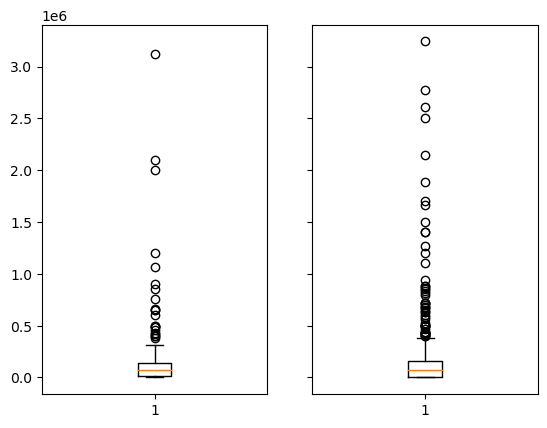

In [186]:
#cause.category.detail missingness dependent on customers.affected?

#PROJECT 2 CREATE BOXPLOT function

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].boxplot(pwr[pwr['CAUSE.CATEGORY.DETAIL'].isna()]['CUSTOMERS.AFFECTED'].dropna())
ax[1].boxplot(pwr[~pwr['CAUSE.CATEGORY.DETAIL'].isna()]['CUSTOMERS.AFFECTED'].dropna())
#list(pwr[pwr['CAUSE.CATEGORY.DETAIL'].isna()]['CUSTOMERS.AFFECTED'])
plt.show()

In [187]:
px.box(pwr[pwr['CAUSE.CATEGORY.DETAIL'].isna()]['CUSTOMERS.AFFECTED'].dropna()) #median 11k
px.box(pwr[~pwr['CAUSE.CATEGORY.DETAIL'].isna()]['CUSTOMERS.AFFECTED'].dropna()) #median 74k

In [198]:
#permutation tests 
#customers affected missingness dependent on outage duration, but not the other way around
def perm_test(pwr, N): 
    pwrc = pwr.copy()
    pwrc = pwrc.assign(has_customers_affected=pwrc['CUSTOMERS.AFFECTED'].notna())
    def observed_stat():
        grouped = pwrc.groupby('has_customers_affected')['OUTAGE.DURATION'].mean()
        test_stat = grouped.loc[True] - grouped.loc[False]
        print(test_stat)
        return test_stat
    observed_stat = observed_stat()
    def sim_null_stat():
        shuffled = pwrc.copy()
        shuffled['has_customers_affected'] = np.random.permutation(shuffled['has_customers_affected'])
        grouped = shuffled.groupby('has_customers_affected')['OUTAGE.DURATION'].mean()
        test_stat = grouped.loc[True] - grouped.loc[False]
        return test_stat
    sim_stats = []
    for _ in range(N):
        sim_stats.append(sim_null_stat())
    
    p_val = (np.array(sim_stats) >= observed_stat).mean()
    fig = px.histogram(pd.DataFrame(sim_stats), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Test Stat') 
    fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
    fig.show()
    return p_val
perm_test(pwr, 5000)

773.5465909090908


0.0062

In [199]:
# def perm_test(pwr, N): 
#     pwrc = pwr.copy()
#     pwrc = pwrc.assign(has_customers_affected=pwrc['CUSTOMERS.AFFECTED'].notna())
#     def observed_stat():
#         grouped = pwrc.groupby('has_customers_affected')['ANOMALY.LEVEL'].mean()
#         test_stat = grouped.loc[True] - grouped.loc[False]
#         return test_stat
#     observed_stat = observed_stat()
#     def sim_null_stat():
#         shuffled = pwrc.copy()
#         shuffled['has_customers_affected'] = np.random.permutation(shuffled['has_customers_affected'])
#         grouped = shuffled.groupby('has_customers_affected')['ANOMALY.LEVEL'].mean()
#         test_stat = grouped.loc[True] - grouped.loc[False]
#         return test_stat
#     sim_stats = []
#     for _ in range(N):
#         sim_stats.append(sim_null_stat())
    
#     p_val = (np.array(sim_stats) >= observed_stat).mean()
#     fig = px.histogram(pd.DataFrame(sim_stats), x=0, nbins=50, histnorm='probability', 
#                    title='Empirical Distribution of the Test Stat') 
#     fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
#     fig.show()
#     return p_val
# perm_test(pwr, 5000)

In [200]:
#customers affected missingness not dependent on RES.SALES
def perm_test(pwr, N): 
    pwrc = pwr.copy()
    pwrc = pwrc.assign(has_customers_affected=pwrc['CUSTOMERS.AFFECTED'].notna())
    def observed_stat():
        grouped = pwrc.groupby('has_customers_affected')['RES.SALES'].mean()
        test_stat = grouped.loc[True] - grouped.loc[False]
        return test_stat
    observed_stat = observed_stat()
    def sim_null_stat():
        shuffled = pwrc.copy()
        shuffled['has_customers_affected'] = np.random.permutation(shuffled['has_customers_affected'])
        grouped = shuffled.groupby('has_customers_affected')['RES.SALES'].mean()
        test_stat = grouped.loc[True] - grouped.loc[False]
        return test_stat
    sim_stats = []
    for _ in range(N):
        sim_stats.append(sim_null_stat())
    
    p_val = (np.array(sim_stats) >= observed_stat).mean()
    fig = px.histogram(pd.DataFrame(sim_stats), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Test Stat') 
    fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
    fig.show()
    return p_val
perm_test(pwr, 5000)

0.1182

In [ ]:
pwrcc = pwr.copy()
pwrcc = pwrcc.assign(has_customers_affected=pwrcc['CUSTOMERS.AFFECTED'].notna())
grouped = pwrc.groupby('has_customers_affected')[''].mean()

### Missing Value Imputation

In [191]:
print(pwr['DEMAND.LOSS.MW'].isna().sum())
print(pwr[pwr['DEMAND.LOSS.MW']==0]['YEAR'].count())

# print(pwr['CUSTOMERS.AFFECTED'].isna().sum())
# print(pwr[pwr['CUSTOMERS.AFFECTED']==0]['YEAR'].count())

705
196


In [192]:
pwr['DEMAND.LOSS.MW'] = pwr['DEMAND.LOSS.MW'].fillna(0)
#pwr['CUSTOMERS.AFFECTED'] = pwr['CUSTOMERS.AFFECTED'].fillna(0)

In [193]:
#Imputing missing values with mean
pwr[pwr['TOTAL.SALES'].isna()].merge(pwr[pwr['TOTAL.PRICE'].isna()], how='inner').iloc[:,10:40] #why do those 22 have na? 
#maybe they were collected from a source that didn't have that data?
pwr['TOTAL.PRICE'] = pwr['TOTAL.PRICE'].fillna(pwr['TOTAL.PRICE'].mean())
pwr['TOTAL.SALES'] = pwr['TOTAL.SALES'].fillna(pwr['TOTAL.SALES'].mean())
pwr['ANOMALY.LEVEL'] = pwr['ANOMALY.LEVEL'].fillna(pwr['ANOMALY.LEVEL'].mean())

In [194]:
# fill duration with probabilistic imputation by grouping by cause category

## Step 4: Hypothesis Testing

Permutation test:

Null Hypothesis: the mean duration of power outages caused by severe weather is equal compared to other causes combined. (mean s - mean ns = 0)

Alternate Hypothesis: the mean duration of power outages caused by severe weather is greater than  other causes combined. (mean s - mean ns > 0)

In [35]:
# difference in means = 0
pwr[pwr['CAUSE.CATEGORY'] == 'severe weather']['OUTAGE.DURATION'].mean()

3883.9852150537636

In [36]:
pwr[pwr['CAUSE.CATEGORY'] != 'severe weather']['OUTAGE.DURATION'].mean()

1346.1789617486338

In [151]:
#wait maybe I need to shuffle the durations accross weather categories
# def perm_test_means(pwr, N):
#     def obs_stat():
#         mean_sev_outage = pwr[pwr['CAUSE.CATEGORY'] == 'severe weather']['OUTAGE.DURATION'].mean()
#         mean_nonsev_outage = pwr[pwr['CAUSE.CATEGORY'] != 'severe weather']['OUTAGE.DURATION'].mean()
#         return mean_sev_outage - mean_nonsev_outage
#     def sim_null():
#         shuffled = pwr.copy()
#         shuffled['OUTAGE.DURATION'] = np.random.permutation(shuffled['OUTAGE.DURATION'])
#         mean_sev_outage = shuffled[shuffled['CAUSE.CATEGORY'] == 'severe weather']['OUTAGE.DURATION'].mean()
#         mean_nonsev_outage = shuffled[shuffled['CAUSE.CATEGORY'] != 'severe weather']['OUTAGE.DURATION'].mean()
#         return mean_sev_outage - mean_nonsev_outage
#     sim_stats = []
#     for _ in range(N):
#         sim_stats.append(sim_null())
#     p_val = (np.array(sim_stats) >= obs_stat.mean())
#     fig = px.histogram(pd.DataFrame(sim_stats), x=0, nbins=50, histnorm='probability', 
#                    title='Empirical Distribution of the Test Stat') 
#     fig.add_vline(x=obs_stat, line_dash = 'dash', line_color = 'firebrick')
#     fig.show()
#     return p_val
# perm_test_means(pwr, 1000)

def perm_test_means(pwr, N): 
#     pwrc = pwr.copy()
#     pwrc = pwrc.assign(has_customers_affected=pwrc['CUSTOMERS.AFFECTED'].notna())
    def observed_stat():
        mean_sev_outage = pwr[pwr['CAUSE.CATEGORY'] == 'severe weather']['OUTAGE.DURATION'].mean()
        mean_nonsev_outage = pwr[pwr['CAUSE.CATEGORY'] != 'severe weather']['OUTAGE.DURATION'].mean()
        return mean_sev_outage - mean_nonsev_outage
    observed_stat = observed_stat()
    def sim_null_stat():
        shuffled = pwr.copy()
        shuffled['OUTAGE.DURATION'] = np.random.permutation(shuffled['OUTAGE.DURATION'])
        mean_sev_outage = shuffled[shuffled['CAUSE.CATEGORY'] == 'severe weather']['OUTAGE.DURATION'].mean()
        mean_nonsev_outage = shuffled[shuffled['CAUSE.CATEGORY'] != 'severe weather']['OUTAGE.DURATION'].mean()
        return mean_sev_outage - mean_nonsev_outage
    sim_stats = []
    for _ in range(N):
        sim_stats.append(sim_null_stat())
    
    p_val = (np.array(sim_stats) >= observed_stat).mean()
    fig = px.histogram(pd.DataFrame(sim_stats), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Test Stat') 
    fig.add_vline(x=observed_stat, line_dash = 'dash', line_color = 'firebrick')
    fig.show()
    return p_val
perm_test_means(pwr, 1000)

0.0

## Step 5: Framing a Prediction Problem

In [38]:
# TODO
#Predict the duration of a power outage.
#maybe predict if its an intentional attack.

#redundant/unnecessary features: postal code, hurricane name, 
# duration(bc you would know it was an attack by the time you fixed it?), 
# #all econ factors (bc its the same by state and date), population factors (same), 
# land area features (same by state), YEAR (bc we are predicting for future)

#So this leaves us with: U.S._STATE, 
# NERC.REGION, CLIMATE.REGION, ANOMALY.LEVEL,
# OUTAGE.START.DATE (w/out year for all times), 
# OUTAGE.START.TIME, OUTAGE.RESTORATION.TIME, OUTAGE.DURATION,
# DEMAND.LOSS.MW, CUSTOMERS.AFFECTED, RES.PRICE, RES.PRICE, COM.PRICE, IND.PRICE,  
# TOTAL.PRICE, RES.SALES, COM.SALES, IND.SALES, TOTAL.SALES, RES.PERCEN, COM.PERCEN, IND.PERCEN,
# RES.CUSTOMERS, COM.CUSTOMERS, IND.CUSTOMERS, TOTAL.CUSTOMERS,  ....

#everything except: YEAR, MONTH, POSTAL.CODE, OUTAGE.RESTORATION.DATE, OUTAGE.RESTORATION.TIME, 
# CAUSE.CATEGORY, CAUSE.CATEGORY.DETAIL, HURRICANE.NAMES


In [39]:
pwr.groupby(['U.S._STATE', 'YEAR', 'MONTH'])['IND.PRICE'].last()

U.S._STATE  YEAR  MONTH
Alabama     2000  8.0      4.48
                  12.0     3.72
            2013  4.0      5.41
            2014  6.0      6.89
            2015  7.0      6.82
                           ... 
Wyoming     2010  11.0     5.02
            2011  5.0      5.36
                  11.0     5.72
            2013  6.0      6.40
                  8.0      6.39
Name: IND.PRICE, Length: 989, dtype: float64

In [40]:
pwr.columns#.groupby(['U.S._STATE', 'YEAR', 'MONTH'])['IND.PRICE'].mean()# == pwr.groupby(['U.S._STATE', 'YEAR'])['IND.PRICE'].last()

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT',
       'PCT

since we are doing binary classification between 'intentional attack' and not, we can transform the CAUSE.CATEGORY column

In [203]:
pwrc = pwr.copy()
pwrc['IS.ATTACK'] = (pwrc['CAUSE.CATEGORY'] == 'intentional attack')

## Step 6: Baseline Model

In [248]:
# we want to get a higher accuracy than a constant prediction, so higher than 73%
pd.Series(model.predict(X_test)).value_counts(normalize=True)

False    0.729167
True     0.270833
dtype: float64

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [249]:
preproc = ColumnTransformer(
    transformers=[
        ('ohe-nerc-region', OneHotEncoder(handle_unknown='ignore'), ['NERC.REGION']),
        ('ohe-climate-region', OneHotEncoder(handle_unknown='ignore'), ['CLIMATE.REGION']),

    ],
    remainder='drop' 
)

baseline_pl = Pipeline([
    ('preprocessor', preproc), 
    ('rf', RandomForestClassifier(max_depth = 30))
])
baseline_pl

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe-nerc-region',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['NERC.REGION']),
                                                 ('ohe-climate-region',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CLIMATE.REGION'])])),
                ('rf', RandomForestClassifier(max_depth=30))])

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))
def r2(actual, pred):
    return np.var(pred) / np.var(actual)

X_train, X_test, y_train, y_test = (
        train_test_split(pwrc.drop(columns='IS.ATTACK'), pwrc['IS.ATTACK'], random_state = 0, train_size = 0.75, test_size = 0.25)
    )


base_model = baseline_pl.fit(X_train, y_train)

predtrn = base_model.predict(X_train)
train_acc = accuracy_score(y_train, predtrn)

predtst = base_model.predict(X_test)
test_acc = accuracy_score(y_test, predtst)

print(f'train accuracy: {train_acc}\n test accuracy: {test_acc}')

train accuracy: 0.7919930374238469
 test accuracy: 0.7473958333333334


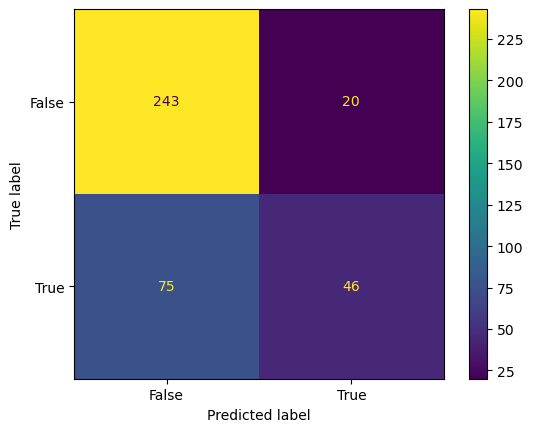

In [251]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predtst)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(base_model, X_test, y_test);
plt.grid(False)

In [252]:
metrics.f1_score(y_test, predtst)

0.4919786096256684

## Step 7: Final Model

In [207]:
pwr.groupby('CLIMATE.REGION')['TOTAL.REALGSP'].count()#.std(ddof=1).astype(np.float32)

CLIMATE.REGION
Central               200
East North Central    138
Non-Contiguous          5
Northeast             350
Northwest             132
South                 229
Southeast             153
Southwest              92
West                  217
West North Central     17
Name: TOTAL.REALGSP, dtype: int64

In [208]:
from sklearn.base import BaseEstimator, TransformerMixin

class StdScalerByGroup(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass
        
    def fit(self, X, y=None):    
        # X might not be a pandas DataFrame (e.g. a np.array)
        df = pd.DataFrame(X)
        if len(X.shape) == 1:
            df = df.T

        dfstd = df.groupby(df.columns[0]).std(ddof=1).astype(np.float32).fillna(0)
        dfmn = df.groupby(df.columns[0]).mean().astype(np.float32).fillna(0)        

        self.grps_ = dfstd.merge(dfmn, left_index = True, right_index = True, suffixes = ('_std', '_mean'))
        return self

    def transform(self, X, y=None):
        
        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        
        df = pd.DataFrame(X)
        z_grps = pd.DataFrame(columns = df.columns)
        df_ft = df.drop(columns = [df.columns[0]]).columns
        
        for grp in df.iloc[:,0].unique():
            if (isinstance(grp, np.float64)) | (isinstance(grp, np.int64)):
                grp = int(grp)
            
            cur_grp = df[df[df.columns[0]] == grp]

            if grp in self.grps_.index:
                for feat in df_ft:
                    if (self.grps_.loc[grp, f'{feat}_std'] == 0) | (self.grps_.loc[grp, f'{feat}_std'] == np.NaN):
                        cur_grp[feat] = 0
                    else:
                        cur_grp[feat] = (cur_grp[feat] - self.grps_.loc[grp, f'{feat}_mean'])/ self.grps_.loc[grp, f'{feat}_std']
            
            z_grps = pd.concat((z_grps, cur_grp), axis = 0)
        
        z_grps = z_grps.reset_index().sort_values('index').set_index('index')
        out1 = z_grps.set_index(df.columns[0])
        return out1

In [209]:
preproc = ColumnTransformer(
    transformers=[
        ('std-customers', StdScalerByGroup(), ['CLIMATE.REGION','TOTAL.CUSTOMERS']),
        ('take-price', FunctionTransformer(lambda x: x), ['TOTAL.PRICE']),
        ('take-sales', FunctionTransformer(lambda x: x), ['TOTAL.SALES']),
        ('take-anomaly', FunctionTransformer(lambda x: x), ['ANOMALY.LEVEL']),
        ('std-realgsp', StdScalerByGroup(), ['U.S._STATE','TOTAL.REALGSP']),
        ('take-res-cust-pct', FunctionTransformer(lambda x: x), ['RES.CUST.PCT']),
        ('take-com-cust-pct', FunctionTransformer(lambda x: x), ['COM.CUST.PCT']),
        ('take-ind-cust-pct', FunctionTransformer(lambda x: x), ['IND.CUST.PCT']),
        ('ohe-state', OneHotEncoder(handle_unknown='ignore'), ['U.S._STATE']),
        ('ohe-nerc-region', OneHotEncoder(handle_unknown='ignore'), ['NERC.REGION']),
        ('ohe-climate-region', OneHotEncoder(handle_unknown='ignore'), ['CLIMATE.REGION'])

    ],
    remainder='drop' 
)

In [210]:
pl = Pipeline([
        ('preprocessor', preproc), 
        ('rf', RandomForestClassifier())
    ])

In [211]:
pl.fit(X_train, y_train)
predtst = pl.predict(X_test)
accuracy_score(y_test, predtst)

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

0.8541666666666666

In [212]:
import warnings
warnings.filterwarnings('ignore')

In [213]:
%%time
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'rf__max_depth': [5, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40], 
    'rf__min_samples_split': [2, 3, 4, 5, 10, 15]#,
    #'rf__criterion': ['gini', 'entropy']
}
print(np.prod([len(v) for v in hyperparameters.values()]))
searcher = GridSearchCV(pl, hyperparameters, cv=5, n_jobs = -1, scoring = 'accuracy', error_score="raise") #cross validation


78
CPU times: user 393 µs, sys: 533 µs, total: 926 µs
Wall time: 1.88 ms


In [214]:
%%time
searcher.fit(X_train, y_train)

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is try

Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is try

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is try

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is try

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is try

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is try

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is try

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

CPU times: user 9.37 s, sys: 709 ms, total: 10.1 s
Wall time: 4min 53s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('std-customers',
                                                                         StdScalerByGroup(),
                                                                         ['CLIMATE.REGION',
                                                                          'TOTAL.CUSTOMERS']),
                                                                        ('take-price',
                                                                         FunctionTransformer(func=<function <lambda> at 0x7faed2f83820>),
                                                                         ['TOTAL.PRICE']),
                                                                        ('take-sales',
                                                                         FunctionTransformer(func=<function <lambda> at 0x7faed2f83

In [483]:
searcher.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [215]:
grid_search= pd.DataFrame(np.vstack([searcher.cv_results_[f'split{i}_test_score'] for i in range(5)]))
grid_search.mean(axis=0)

0     0.828525
1     0.830260
2     0.823300
3     0.824169
4     0.825905
        ...   
73    0.846797
74    0.848540
75    0.850272
76    0.851133
77    0.845912
Length: 78, dtype: float64

In [216]:
searcher.best_params_

{'rf__max_depth': 28, 'rf__min_samples_split': 2}

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/q9/v_1glltx69s_h28_qxb0rh3r0000gn/T/ipykernel_2764/2802940277.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [347]:
#pwr.groupby('CAUSE.CATEGORY.DETAIL').count()

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


preproc = ColumnTransformer(
    transformers=[
        ('take-price', FunctionTransformer(lambda x: x), ['TOTAL.PRICE']),
        ('take-sales', FunctionTransformer(lambda x: x), ['TOTAL.SALES']),
        ('take-anomaly', FunctionTransformer(lambda x: x), ['ANOMALY.LEVEL']),
        ('std-realgsp', StdScalerByGroup(), ['CLIMATE.REGION','TOTAL.REALGSP']),
        ('take-res-cust-pct', FunctionTransformer(lambda x: x), ['RES.CUST.PCT']),
        ('take-com-cust-pct', FunctionTransformer(lambda x: x), ['COM.CUST.PCT']),
        ('take-ind-cust-pct', FunctionTransformer(lambda x: x), ['IND.CUST.PCT']),
        ('ohe-nerc-region', OneHotEncoder(handle_unknown='ignore'), ['NERC.REGION']),
        ('ohe-climate-region', OneHotEncoder(handle_unknown='ignore'), ['CLIMATE.REGION']),

    ],
    remainder='drop' 
)

final_pl = Pipeline([
    ('preprocessor', preproc), 
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split =2))
])
final_pl

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('take-price',
                                                  FunctionTransformer(func=<function <lambda> at 0x7faed30e23a0>),
                                                  ['TOTAL.PRICE']),
                                                 ('take-sales',
                                                  FunctionTransformer(func=<function <lambda> at 0x7faed30e2310>),
                                                  ['TOTAL.SALES']),
                                                 ('take-anomaly',
                                                  FunctionTransformer(func=<function <lambda> at 0x7faed30e24c0>),
                                                  ['ANOMALY.LEVEL']),
                                                 ('std-...
                                                  FunctionTransformer(func=<function <lambda> at 0x7faed30e2700>),
                                                

In [221]:
model = final_pl.fit(X_train, y_train)
# predtrn = model.predict(X_train)
# train_accs.append(accuracy_score(y_train, predtrn))

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
#0.8645833333333334
#6614583333333334

0.8776041666666666

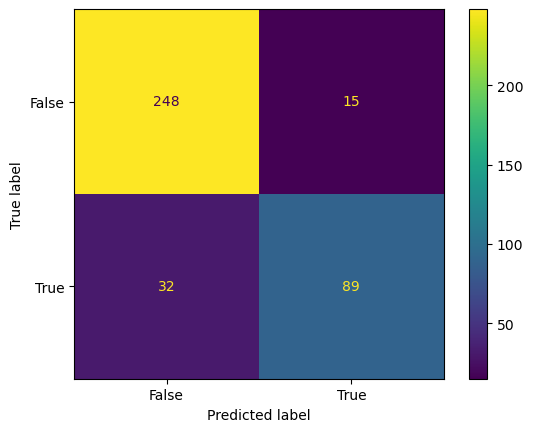

In [222]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);
plt.grid(False)

In [223]:
pwrc['CAUSE.CATEGORY'].value_counts(normalize=True)

severe weather                   0.497717
intentional attack               0.272668
system operability disruption    0.082844
public appeal                    0.045010
equipment failure                0.038487
fuel supply emergency            0.033268
islanding                        0.030007
Name: CAUSE.CATEGORY, dtype: float64

In [224]:
y_test.value_counts(normalize=True)

False    0.684896
True     0.315104
Name: IS.ATTACK, dtype: float64

In [226]:
model.score(X_test, y_test)

0.8776041666666666

In [242]:
metrics.f1_score(y_test, y_pred)

0.7911111111111111

## Step 8: Fairness Analysis

In [438]:
#does it work differently of states with populations above vs below pwr['POPULATION'].median()

In [253]:
pwr['POPULATION'].median()

8769252.0

In [254]:
pwr[pwr['POPULATION'] < pwr['POPULATION'].median()].groupby('CAUSE.CATEGORY').count()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
CAUSE.CATEGORY,,,,,,,,,,,,,,,,,,,,,
equipment failure,20,19,20,20,20,20,20,20,19,19,...,20,20,20,19,19,20,20,20,20,20
fuel supply emergency,15,14,15,15,15,15,15,15,14,14,...,15,15,15,15,15,15,15,15,15,15
intentional attack,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326
islanding,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
public appeal,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
severe weather,314,311,314,314,314,314,314,314,311,311,...,314,314,314,305,305,314,314,314,314,314
system operability disruption,36,35,36,36,36,36,36,36,35,35,...,36,36,36,36,36,36,36,36,36,36


In [255]:
pwr[pwr['POPULATION'] > pwr['POPULATION'].median()].groupby('CAUSE.CATEGORY').count()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
CAUSE.CATEGORY,,,,,,,,,,,,,,,,,,,,,
equipment failure,39,38,39,39,39,39,39,39,38,38,...,39,39,39,39,39,39,39,39,39,39
fuel supply emergency,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
intentional attack,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
islanding,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
public appeal,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
severe weather,444,443,444,444,444,444,444,444,443,443,...,444,444,444,444,444,444,444,444,444,444
system operability disruption,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91


In [259]:
results = X_test
results['pop_bracket'] = results['POPULATION']#.apply(lambda x: 5 * (x // 5 + 1))
results['prediction'] = y_pred
results['actual'] = y_test
results['low_pop'] = (results['POPULATION'] < pwr['POPULATION'].median()).replace({True: 'low pop', False: 'high pop'})
results.groupby('low_pop')['prediction'].mean()
compute_accuracy = lambda x: accuracy_score(x['actual'], x['prediction'])
(
    results
    .groupby('low_pop')
    .apply(compute_accuracy)
    .rename('accuracy')
)

low_pop
high pop    0.86413
low pop     0.89000
Name: accuracy, dtype: float64

In [262]:
obs = results.groupby('low_pop').apply(compute_accuracy).diff().abs().iloc[-1]
diff_in_acc = []
for _ in range(1000):
    s = (
        results[['low_pop', 'prediction', 'actual']]
        .assign(low_pop=np.random.permutation(results['low_pop']))
        .groupby('low_pop')
        .apply(compute_accuracy)
        .diff().abs()
        .iloc[-1]
    )
    
    diff_in_acc.append(s)

In [268]:
fig = pd.Series(diff_in_acc).plot(kind='hist', histnorm='probability', nbins=20,
                            title='Absolute Difference in Accuracy Between Low and High Population Groups')
fig.add_vline(x=obs, line_color='red')

In [267]:
p = (obs >= diff_in_acc).mean()
p

0.553